<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork971-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# Model Evaluation and Refinement


Estimated time needed: **30** minutes
    

## Objectives

After completing this lab you will be able to:

* Evaluate and refine prediction models


<h2>Table of Contents</h2>
<ul>
    <li><a href="#ref1">Model Evaluation </a></li>
    <li><a href="#ref2">Over-fitting, Under-fitting and Model Selection </a></li>
    <li><a href="#ref3">Ridge Regression </a></li>
    <li><a href="#ref4">Grid Search</a></li>
</ul>


This dataset was hosted on IBM Cloud object. Click <a href="https://cocl.us/DA101EN_object_storage">HERE</a> for free storage.


In [1]:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3 -y
#! mamba install numpy=1.21.2 -y
#! mamba install sklearn=0.20.1 -y
#! mamba install   ipywidgets=7.4.2 -y

In [2]:
#Install libraries
%pip install pandas matplotlib scipy scikit-learn seaborn ipywidgets

In [3]:
import pandas as pd
import numpy as np

# Import clean data 
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(path)

In [4]:
df.to_csv('module_5_auto.csv')

 First, let's only use numeric data:


In [5]:
df=df._get_numeric_data()
df.head()

Unnamed: 0  Unnamed: 0.1  symboling  normalized-losses  wheel-base  \
0           0             0          3                122        88.6   
1           1             1          3                122        88.6   
2           2             2          1                122        94.5   
3           3             3          2                164        99.8   
4           4             4          2                164        99.4   

     length     width  height  curb-weight  engine-size  ...  stroke  \
0  0.811148  0.890278    48.8         2548          130  ...    2.68   
1  0.811148  0.890278    48.8         2548          130  ...    2.68   
2  0.822681  0.909722    52.4         2823          152  ...    3.47   
3  0.848630  0.919444    54.3         2337          109  ...    3.40   
4  0.848630  0.922222    54.3         2824          136  ...    3.40   

   compression-ratio  horsepower  peak-rpm  city-mpg  highway-mpg    price  \
0                9.0       111.0    5000.0        21           27  13495.0   
1                9.0       111.0    5000.0        21           27  16500.0   
2                9.0       154.0    5000.0        19           26  16500.0   
3               10.0       102.0    5500.0        24           30  13950.0   
4                8.0       115.0    5500.0        18           22  17450.0   

   city-L/100km  diesel  gas  
0     11.190476       0    1  
1     11.190476       0    1  
2     12.368421       0    1  
3      9.791667       0    1  
4     13.055556       0    1  

[5 rows x 21 columns]

 Libraries for plotting:


In [6]:
from ipywidgets import interact, interactive, fixed, interact_manual

<h2>Functions for Plotting</h2>


In [7]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [8]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

### TRANSCRIPTION:

Model Evaluation tells us how our model preforms in the real world.

In the previous module, we talked about the in-sample evaluation.
In-sample evaluation tells us how well our model fits the data already given to train
it.

It does not give us an estimate of how well the trained model can predict new data.
The solution is to split our data up, use the In-sample data or training data to train
the model
.
The rest of the data called test data is used as out-of-sample data.
This data is then used to approximate how the model performs in the real world.

Separating data into training and testing sets is an important part of model evaluation.
We use the test data to get an idea how our model will perform in the real world.
When we split a data set, usually the larger portion of data is used for training and a
smaller part is used for testing.

For example we can use 70% of the data for training; we then use 30% for testing.
We use a training set to build a model and discover predictive relationships.
We then use a testing set to evaluate model performance.
When we have completed testing our model, we should use all the data to train the model.
A popular function in the sci-kit learn package for splitting datasets is the "train test
split" function.

This function randomly splits a dataset into training and testing subsets
From the example code snippet, this method is imported from "sklearn.cross validation."


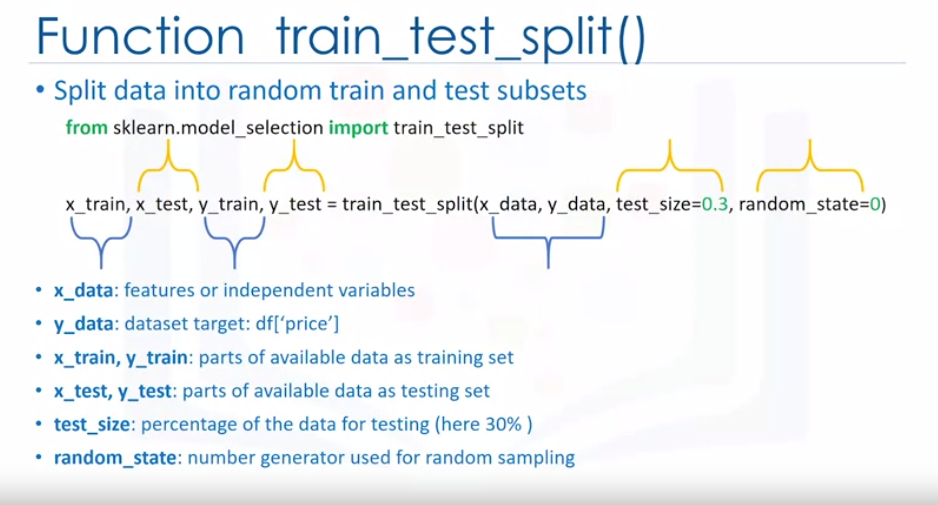


The input parameters y_data is the target variable (in the car appraisal example, it
would be the price), and "x_data", the list of predictor variables. In this case, it would
be all the other variables in the car data set that we are using to try to predict the
price.

The output is an array: "x_train" and "y_train", the subsets for training; "x_test" and "y_test",
the subsets for testing. In this case, the "test size" percentage of
the data for the testing set. Here it is 30%. The random state is a random seed for random
dataset splitting.

Generalization error is a measure of how well our data does at predicting previously unseen
data.

The error we obtain using our testing data is an approximation of this error.

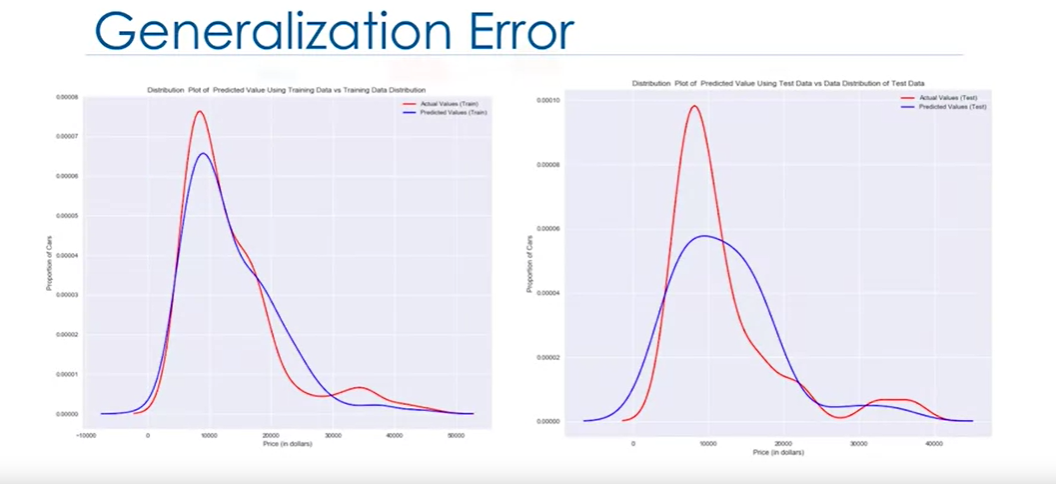

This figure shows the distribution of the actual values in red compared to the predicted
values from a linear regression in blue.
We see the distributions are somewhat similar.
If we generate the same plot using the test data, we see the distributions are relatively
different.
The difference is due to a generalization error and represents what we see in the real
world.

Using a lot of data for training gives us an accurate means of determining how our model
will perform in the real world, but the precision of the performance will be low.

Let's clarify this with an example.
The center of this bullseye represents the correct generalization error; let's say we
take a random sample of the data using 90% of the data for training and 10% for testing.
The first time we experiment we get a good estimate of the training data.
If we experiment again, training the model with a different combination of samples, we
also get a good result, but the results will be different relative to the first time we
run the experiment.

Repeating the experiment again with a different combination of training and testing samples,
the results are relatively close to the Generalization error, but distinct from each other.
Repeating the process, we get good approximation of the generalization
error, but the precision is poor i.e., all the results are extremely different from one
another.

If we use fewer data points to train the model and more to test the model, the accuracy of
the generalization performance will be less, but the model will have good precision.

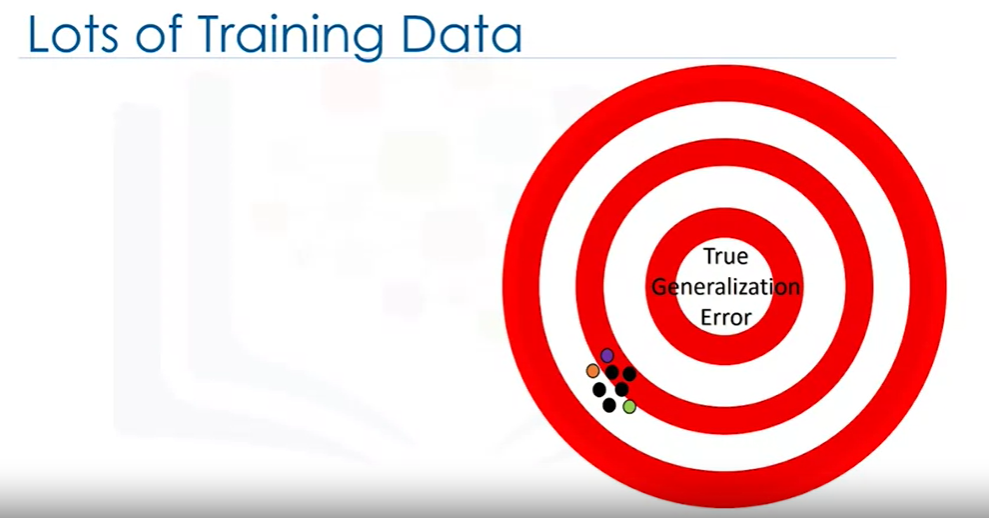

The figure above demonstrates this; all our error estimates are relatively close together,
but they are further away from the true generalization performance.
To overcome this problem, we use cross validation.

One of the most common out-of-sample evaluation metrics is cross-validation.
In this method, the dataset is split into k-equal groups; each group is referred to
as a fold.

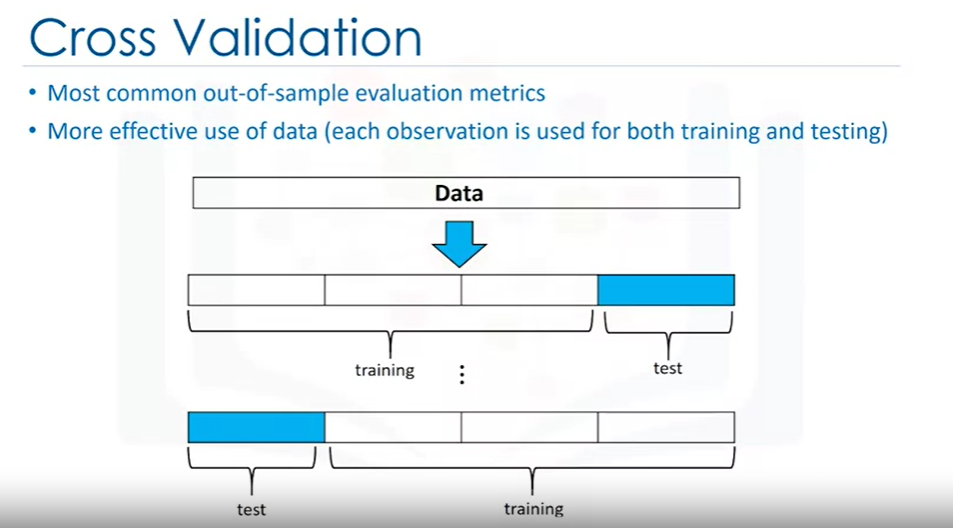

For example 4 folds.
Some of the folds can be used as a training set, which we use to train the model, and
the remaining parts are used as a test set, which we use to test the model.
For example, we can use three folds for training; then use one fold for testing.
This is repeated until each partition is used for both training and testing.
At the end, we use the average results as the estimate of out-of-sample error.
The evaluation metric depends on the model.

For example, the R-squared.

The Simplest way to apply cross validation is to call the `cross_val_score()` function,
which performs multiple 'out-of-sample' evaluations.
This method is imported from sklearn's model selection package.

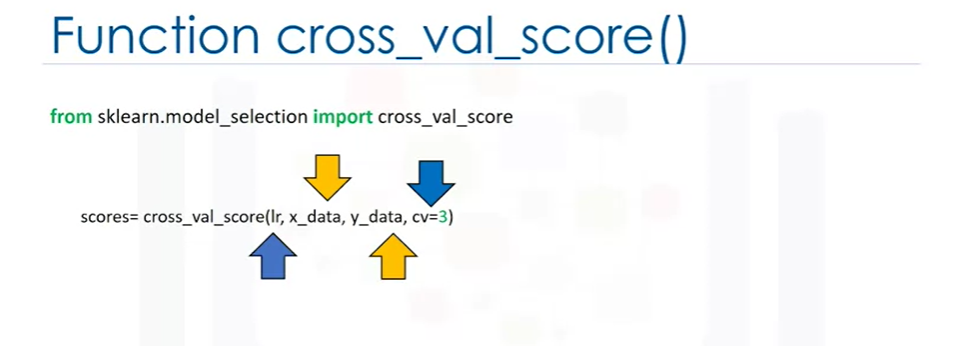

We then use the function cross_val_score(). The first input parameter is the type of model
we are using to do the cross validation.
In this example, we initialized a linear regression model or object lr, which we passed to the
cross_val_score function.
The other parameters are x_data, the predictor variable data, and y_data, the target variable
data.
We can manage the number of partitions with the cv parameter.
Here, cv = 3, which means the data set is split into 3 equal partitions.
The function returns an array of scores, one for each partition that was chosen as the
testing set.
We can average the result together to estimate out-of-sample R-squared using the mean function
in numpy.

Let's see an animation.
Let's see the result of the score array in the last slide.
First, we split the data into three folds. We use two folds for training; the remaining
fold for testing.
The model will produce an output.
We will use the output to calculate a score. In the case of the R-squared i.e., coefficient
of determination.
We will store that value in an array.
We will repeat the process using two folds for training, and one fold one for testing,
save the score, then use a different combination for training, and the remaining fold for testing.
We store the final result.

The cross_val_score() function returns a score value to tell us the cross-validation
result.
What if we want a little more information: what if we want to know the actual predicted
values supplied by our model before the R squared values are calculated?

To do this, we use the cross_val_predict() function.

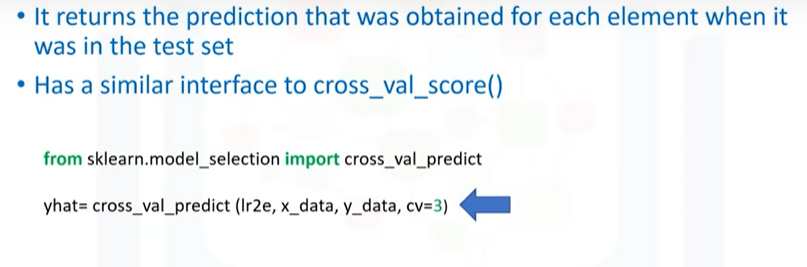

The input parameters are exactly the same as the cross_val_score() function, but
the output is a prediction.
Let's illustrate the process.
First, we split the data into three folds; we use two folds for training, the remaining
fold for testing.
The model will produce an output, and we will store it in and array.
We will repeat the process using two folds for training, one for testing.
The model produces an output again.
Finally, we use the last two folds for training, then we use the testing data.
This final testing fold produces an output.
These predictions are stored in an array.


<h2 id="ref1">Part 1: Training and Testing</h2>

<p>An important step in testing your model is to split your data into training and testing data. We will place the target data <b>price</b> in a separate dataframe <b>y_data</b>:</p>


In [9]:
y_data = df['price']

Drop price data in dataframe **x_data**:


In [10]:
x_data=df.drop('price',axis=1)

Now, we randomly split our data into training and testing data using the function <b>train_test_split</b>. 


In [11]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 21
number of training samples: 180


The <b>test_size</b> parameter sets the proportion of data that is split into the testing set. In the above, the testing set is 10% of the total dataset. 


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #1):</h1>

<b>Use the function "train_test_split" to split up the dataset such that 40% of the data samples will be utilized for testing. Set the parameter "random_state" equal to zero. The output of the function should be the following:  "x_train1" , "x_test1", "y_train1" and  "y_test1".</b>
</div>


In [12]:
# Write your code below and press Shift+Enter to execute 
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 81
number of training samples: 120


<details><summary>Click here for the solution</summary>

```python
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])
```

</details>


Let's import <b>LinearRegression</b> from the module <b>linear_model</b>.


In [13]:
from sklearn.linear_model import LinearRegression

 We create a Linear Regression object:


In [14]:
lre=LinearRegression()

We fit the model using the feature "horsepower":


In [15]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

Let's calculate the R^2 on the test data:


In [16]:
lre.score(x_test[['horsepower']], y_test)

0.36358755750788263

We can see the R^2 is much smaller using the test data compared to the training data.


In [17]:
lre.score(x_train[['horsepower']], y_train)

0.6619724197515104

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2): </h1>
<b> 
Find the R^2  on the test data using 40% of the dataset for testing.
</b>
</div>


In [18]:
# Write your code below and press Shift+Enter to execute 
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)

0.7139364665406973

<details><summary>Click here for the solution</summary>

```python
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)

```

</details>


Sometimes you do not have sufficient testing data; as a result, you may want to perform cross-validation. Let's go over several methods that you can use for cross-validation. 


<h2>Cross-Validation Score</h2>


Let's import <b>model_selection</b> from the module <b>cross_val_score</b>.


In [19]:
from sklearn.model_selection import cross_val_score

We input the object, the feature ("horsepower"), and the target data (y_data). The parameter 'cv' determines the number of folds. In this case, it is 4. 


In [20]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

The default scoring is R^2. Each element in the array has the average R^2 value for the fold:


In [21]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

 We can calculate the average and standard deviation of our estimate:


In [22]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.2911839444756029


We can use negative squared error as a score by setting the parameter  'scoring' metric to 'neg_mean_squared_error'. 


In [23]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.7224759 ])

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #3): </h1>
<b> 
Calculate the average R^2 using two folds, then find the average R^2 for the second fold utilizing the "horsepower" feature: 
</b>
</div>


In [24]:
# Write your code below and press Shift+Enter to execute 
Rc=cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)
Rc.mean()

0.5166761697127429

<details><summary>Click here for the solution</summary>

```python
Rc=cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)
Rc.mean()

```

</details>


You can also use the function 'cross_val_predict' to predict the output. The function splits up the data into the specified number of folds, with one fold for testing and the other folds are used for training. First, import the function:


In [25]:
from sklearn.model_selection import cross_val_predict

We input the object, the feature <b>"horsepower"</b>, and the target data <b>y_data</b>. The parameter 'cv' determines the number of folds. In this case, it is 4. We can produce an output:


In [26]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

### TRANSCRIPTION: Overfitting, underfitting and model selection

If you recall, in the last Module we discussed polynomial regression.
In this section, we will discuss how to pick the best polynomial order and problems that
arise with selecting the wrong order polynomial.

Consider the following function: we assume the training points come from a polynomial
function plus some noise.

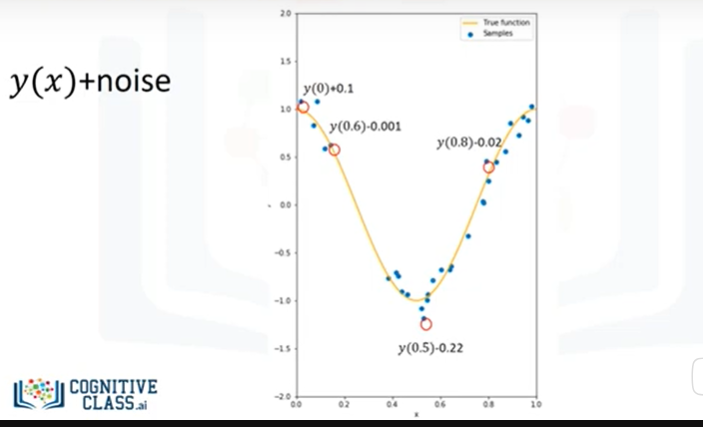

The goal of model selection is to determine the order of the polynomial to provide the
best estimate of the function y x.

If we try and fit the function with a linear function, the line is not complex enough to
fit the data.

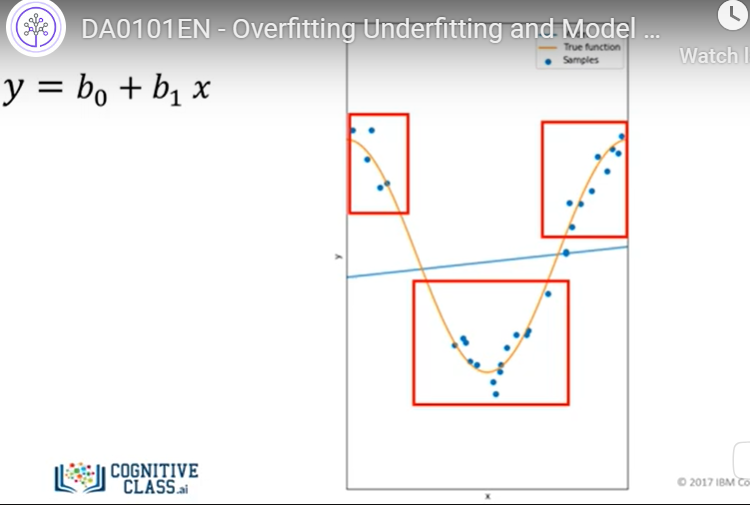

As a result, there are many errors(above).
This is called under-fitting, where the model is too simple to fit the data.

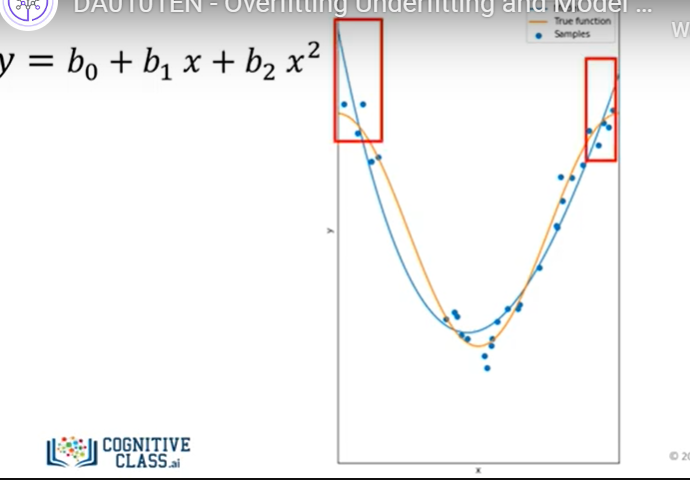

If we increase the order of the polynomial(above), the model fits better, but the model is still
not flexible enough and exhibits under-fitting.

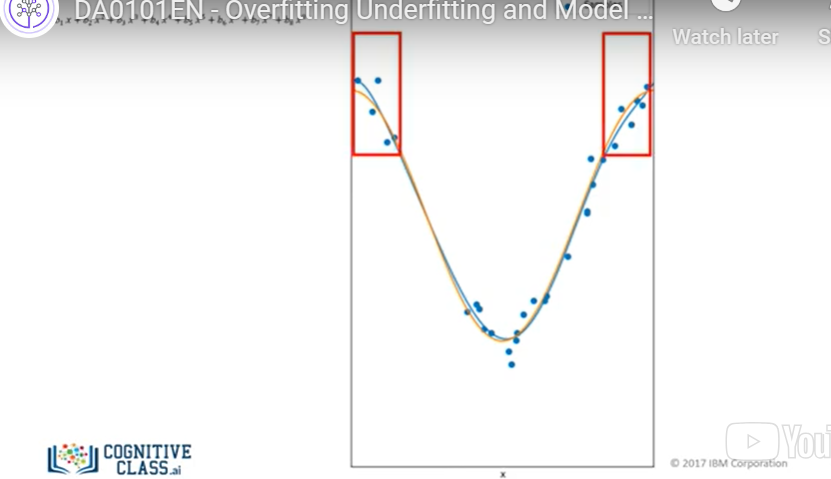

Above is an example of the 8th order polynomial used to fit the data; we see the model does
well at fitting the data and estimating the function, even at the inflection points.

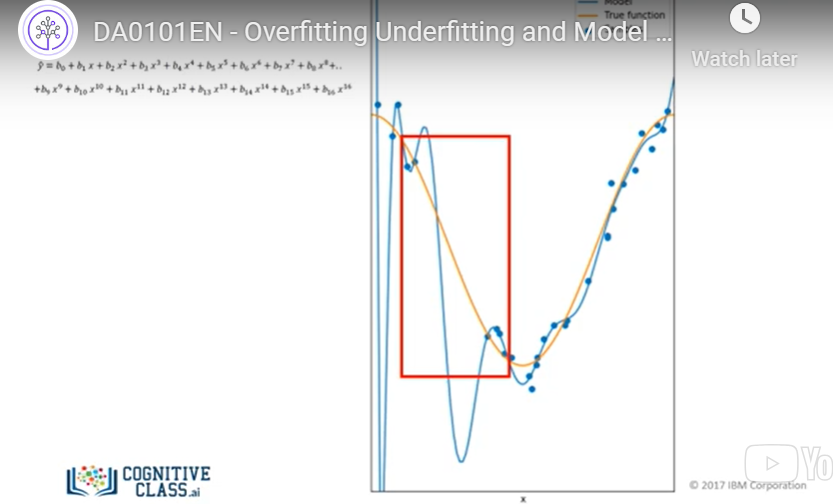

Increasing it to a 16th order polynomial, the model does extremely well at tracking
the training points, but performs poorly at estimating the function.
This is especially apparent where there is little training data; the estimated function
oscillates not tracking the function.
This is called over-fitting, where the model is too flexible and fits the noise rather
than the function.

Let's look at a plot of the mean square error for the training and testing set for different
order polynomials.

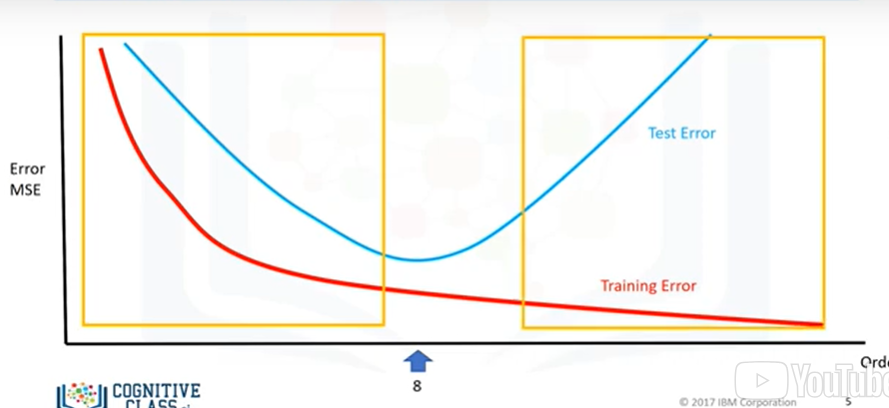

The horizontal axis represents the order of the polynomial; the vertical axis is the mean
square error.
The training error decreases with the order of the polynomial.
The test error is a better means of estimating the error of a polynomial. The error decreases
till the best order of the polynomial is determined, then the error begins to increase.

We select the order that minimizes the test error, in this case, it was 8.
Anything on the left would be considered under-fitting.
Anything on the right is over-fitting.

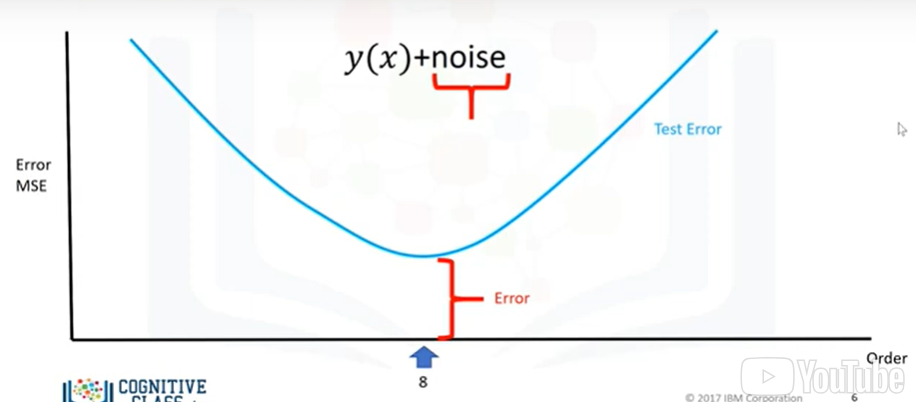

If we select the best order of the polynomial, we will still have some errors, if you recall,
the original expression for the training points.
We see a noise term; this term is one reason for the error.
This is because the noise is random and we can't predict it; this is sometimes referred
to as an irreducible error.

There are other sources of errors as well.
For example, our polynomial assumption may be wrong.
Our sample points may have come from a different function.

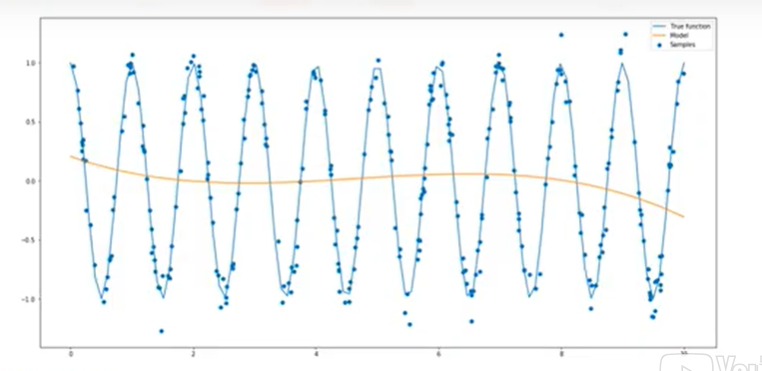

For example, in this plot, the data is generated from a sine wave; the polynomial function
does not do a good job at fitting the sine wave.
For real data, the model may be too difficult to fit, or we may not have the correct type
of data to estimate the function.

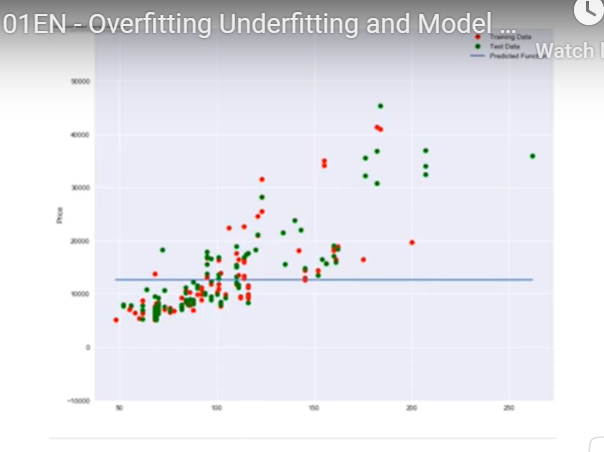

Let's try different order polynomials on the real data using horse power; the red points
represent the training data; the green points represent the test data.
If we just use the mean of the data, our model does not perform well.
A linear function does fit the data better.

A second order model looks similar to the linear function:

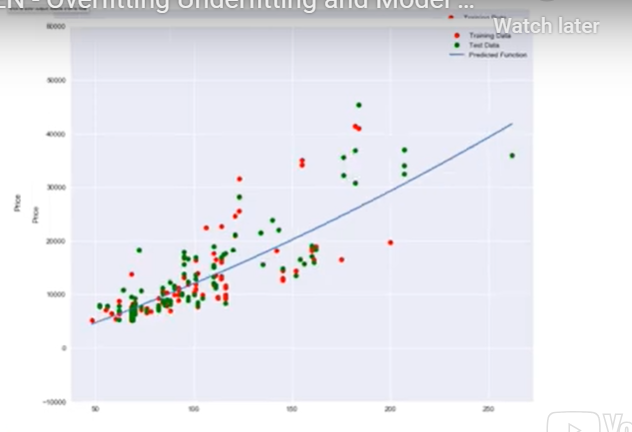

A third order function also appears to increase, like the previous two orders:

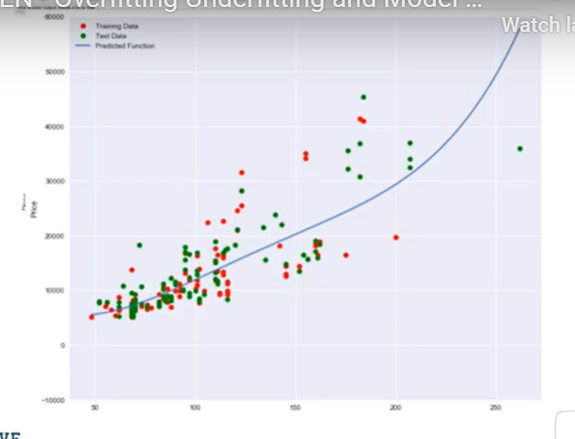

Here we see a 4th order polynomial:

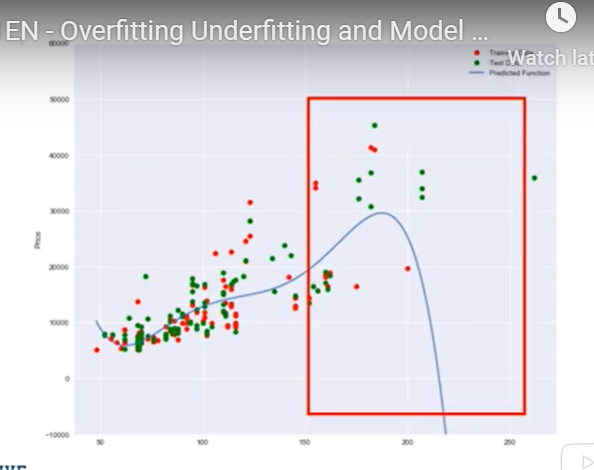

At around 200 horse power, the predicted price suddenly decreases; this seems erroneous.

Let's use R-squared to see if our assumption is correct.
The following is a plot of the R-squared value, the horizontal axis represents the order of
polynomial models.

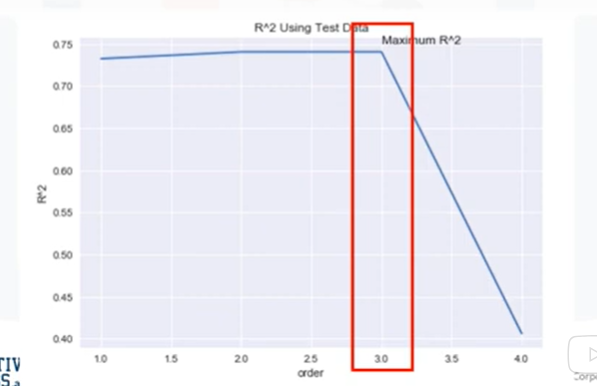

The closer the R-squared is to 1, the more accurate the model is.
Here we see the R-squared is optimal when the order of the polynomial is three.
The R-squared drastically decreases when the order is increased to 4, validating our initial
assumption.

We can calculate different R-squared values as follows:

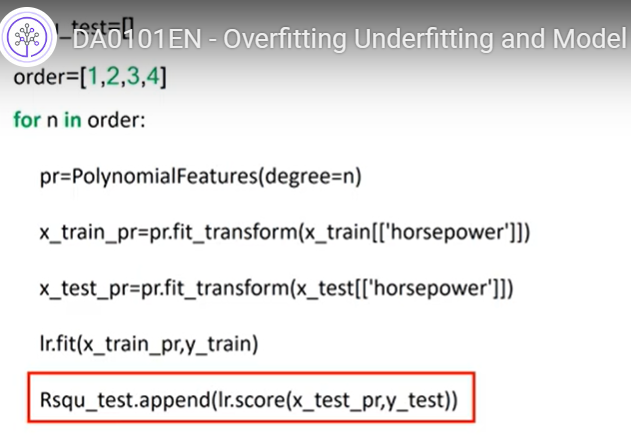

First, we create an empty list to store the values.

We create a list containing different polynomial orders.

We then iterate through the list using a loop. We create a polynomial feature object with
the order of the polynomial as a parameter We transform the training and test data into
a polynomial using the fit transform method. We fit the regression model using the transformed
data. We then calculate the R-squared using the
test data and store it in the array.


<h2 id="ref2">Part 2: Overfitting, Underfitting and Model Selection</h2>

<p>It turns out that the test data, sometimes referred to as the "out of sample data", is a much better measure of how well your model performs in the real world.  One reason for this is overfitting.

Let's go over some examples. It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.</p>


Let's create Multiple Linear Regression objects and train the model using <b>'horsepower'</b>, <b>'curb-weight'</b>, <b>'engine-size'</b> and <b>'highway-mpg'</b> as features.


In [27]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

Prediction using training data:


In [28]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

Prediction using test data: 


In [29]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

Let's perform some model evaluation using our training and testing data separately. First, we import the seaborn and matplotlib library for plotting.


In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Let's examine the distribution of the predicted values of the training data.


d:\programs\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
d:\programs\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


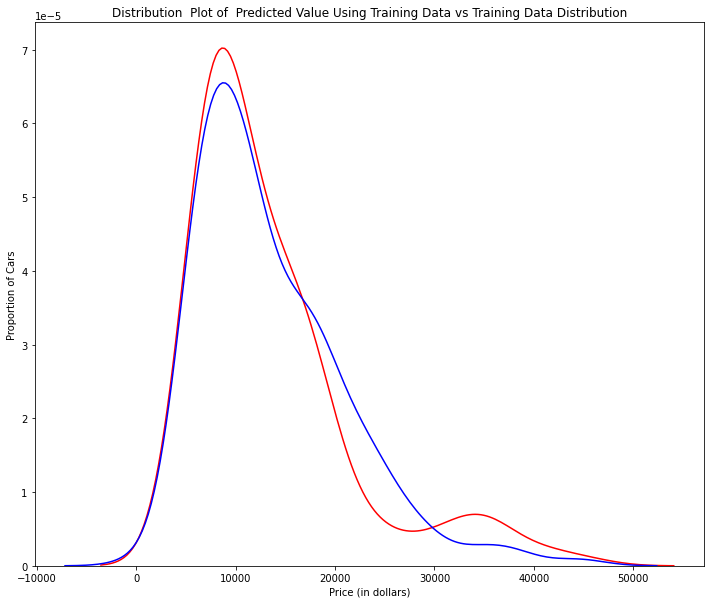

In [31]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Figure 1: Plot of predicted values using the training data compared to the actual values of the training data. 


So far, the model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values. 


d:\programs\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
d:\programs\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


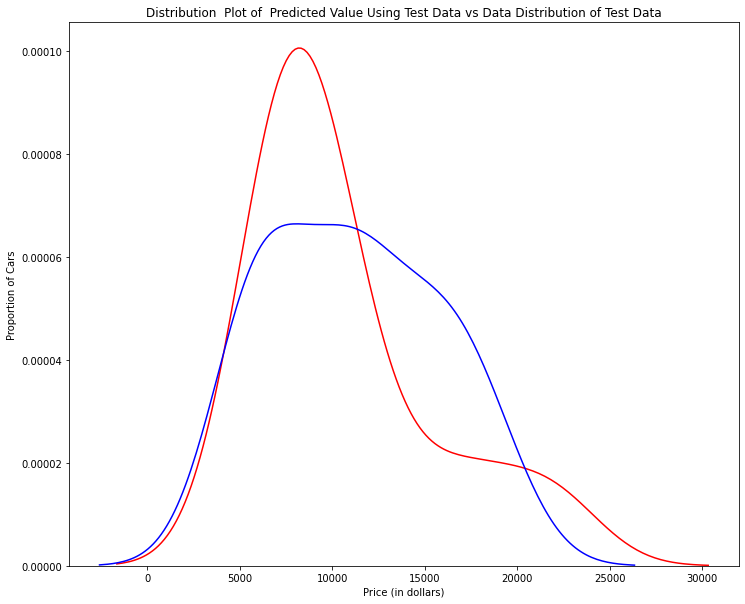

In [32]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Figure 2: Plot of predicted value using the test data compared to the actual values of the test data. 


<p>Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent in the range of 5000 to 15,000. This is where the shape of the distribution is extremely different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.</p>


In [33]:
from sklearn.preprocessing import PolynomialFeatures

<h4>Overfitting</h4>
<p>Overfitting occurs when the model fits the noise, but not the underlying process. Therefore, when testing your model using the test set, your model does not perform as well since it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.</p>


Let's use 55 percent of the data for training and the rest for testing:


In [34]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

We will perform a degree 5 polynomial transformation on the feature <b>'horsepower'</b>. 


In [35]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

Now, let's create a Linear Regression model "poly" and train it.


In [36]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

We can see the output of our model using the method "predict." We assign the values to "yhat".


In [37]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.65566037,  7307.9878638 , 12213.7877412 , 18893.24796457,
       19995.95185894])

Let's take the first five predicted values and compare it to the actual targets. 


In [38]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.65566037  7307.9878638  12213.7877412  18893.24796457]
True values: [ 6295. 10698. 13860. 13499.]


We will use the function "PollyPlot" that we defined at the beginning of the lab to display the training data, testing data, and the predicted function.


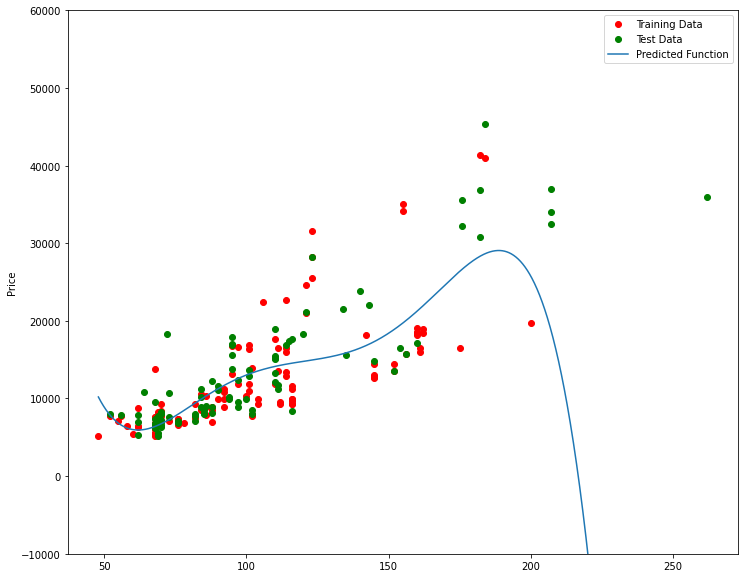

In [39]:
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

Figure 3: A polynomial regression model where red dots represent training data, green dots represent test data, and the blue line represents the model prediction. 


We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points. 


 R^2 of the training data:


In [40]:
poly.score(x_train_pr, y_train)

0.5567716902121724

 R^2 of the test data:


In [41]:
poly.score(x_test_pr, y_test)

-29.87134054062532

We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87.  The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.


Let's see how the R^2 changes on the test data for different order polynomials and then plot the results:


Text(3, 0.75, 'Maximum R^2 ')

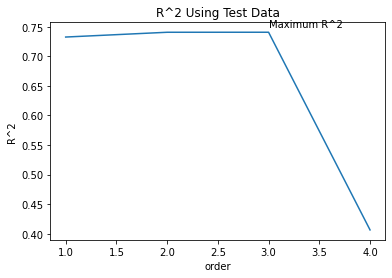

In [42]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

We see the R^2 gradually increases until an order three polynomial is used. Then, the R^2 dramatically decreases at an order four polynomial.


The following function will be used in the next section. Please run the cell below.


In [43]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train,y_test, poly, pr)

The following interface allows you to experiment with different polynomial orders and different amounts of data. 


In [44]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4a):</h1>

<b>We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two.</b>
</div>


In [45]:
# Write your code below and press Shift+Enter to execute 
pr1=PolynomialFeatures(degree=2)

<details><summary>Click here for the solution</summary>

```python
pr1=PolynomialFeatures(degree=2)

```

</details>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4b): </h1>

<b> 
 Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'. Hint: use the method "fit_transform".</b>
</div>


In [46]:
# Write your code below and press Shift+Enter to execute 
x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

<details><summary>Click here for the solution</summary>

```python
x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])


```

</details>


<!-- The answer is below:

x_train_pr1=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

-->


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4c): </h1>
<b> 
How many dimensions does the new feature have? Hint: use the attribute "shape".
</b>
</div>


In [47]:
# Write your code below and press Shift+Enter to execute 
x_train_pr1.shape #there are now 15 features

(110, 15)

<details><summary>Click here for the solution</summary>

```python
x_train_pr1.shape #there are now 15 features


```

</details>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4d): </h1>

<b> 
Create a linear regression model "poly1". Train the object using the method "fit" using the polynomial features.</b>
</div>


In [48]:
# Write your code below and press Shift+Enter to execute 
poly1=LinearRegression().fit(x_train_pr1,y_train)

<details><summary>Click here for the solution</summary>

```python
poly1=LinearRegression().fit(x_train_pr1,y_train)


```

</details>


 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4e): </h1>
<b>Use the method  "predict" to predict an output on the polynomial features, then use the function "DistributionPlot" to display the distribution of the predicted test output vs. the actual test data.</b>
</div>


d:\programs\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
d:\programs\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


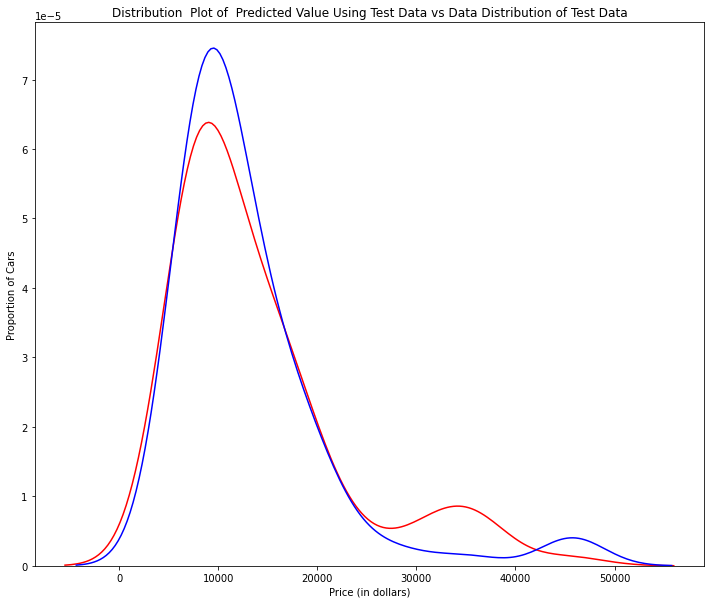

In [49]:
# Write your code below and press Shift+Enter to execute 
yhat_test1=poly1.predict(x_test_pr1)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

<details><summary>Click here for the solution</summary>

```python
yhat_test1=poly1.predict(x_test_pr1)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

```

</details>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4f): </h1>

<b>Using the distribution plot above, describe (in words) the two regions where the predicted prices are less accurate than the actual prices.</b>
</div>


In [50]:
# Write your code below and press Shift+Enter to execute 
#The predicted value is higher than actual value for cars where the price $10,000 range, conversely the predicted price is lower than the price cost in the $30,000 to $40,000 range. As such the model is not as accurate in these ranges.

<details><summary>Click here for the solution</summary>

```python
#The predicted value is higher than actual value for cars where the price $10,000 range, conversely the predicted price is lower than the price cost in the $30,000 to $40,000 range. As such the model is not as accurate in these ranges.

```

</details>



### TRANSCRIPTION:

In this video we’ll discuss Ridge Regression.

Ridge regression prevents over-fitting.

In this video we will focus on polynomial regression for visualization, but over-fitting
is also a big problem when you have multiple independent variables or features.

Consider the following 4th order polynomial in orange.

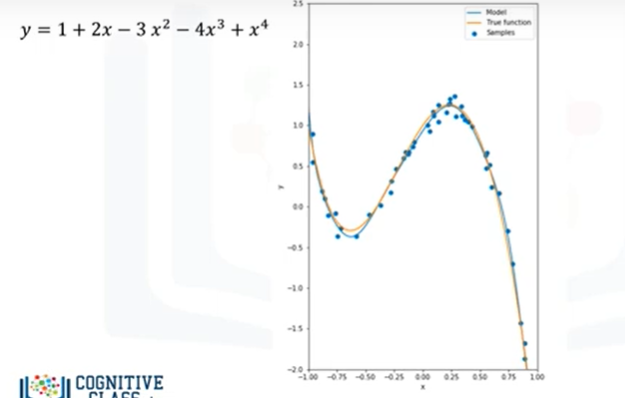

The blue points are generated from this function.
We can use a 10th order polynomial to fit the data.
The estimated function in blue does a good job at approximating the true function.

In many cases real data has outliers.

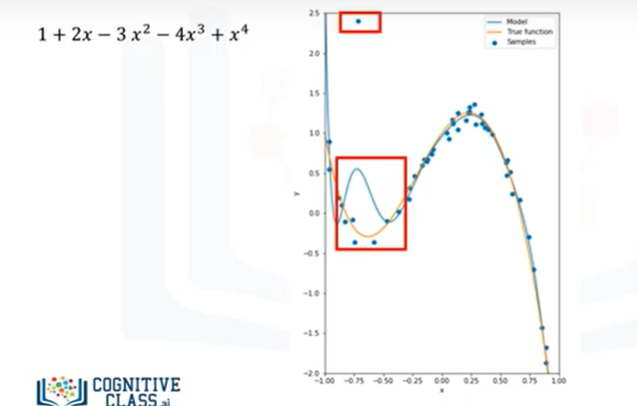

For example, this point shown here does not appear to come from the function in orange.
If we use a 10th order polynomial function to fit the data, the estimated function in
blue is incorrect and is not a good estimate of the actual function in orange.

If we examine the expression for the estimated function, we see the estimated polynomial
coefficients have a very large magnitude.

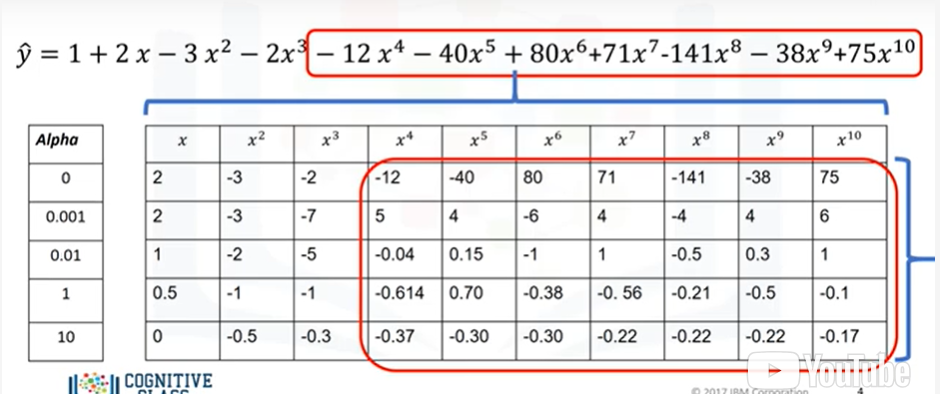

This is especially evident for the higher order polynomials.
Ridge regression controls the magnitude of these polynomial coefficients by introducing
the parameter alpha.
Alpha is a parameter we select before fitting or training the model.
Each row in the following table represents an increasing value of alpha.
Let’s see how different values of alpha change the model.
This table represents the polynomial coefficients for different values of alpha.
The columns correspond to the different polynomial coefficients and the rows correspond to the
different values of alpha.
As alpha increases, the parameters get smaller.
This is most evident for the higher order polynomial features, but alpha must be selected
carefully.

If alpha is too large, the coefficients will approach zero and under-fit the data.

If alpha is zero, the over-fitting is evident:

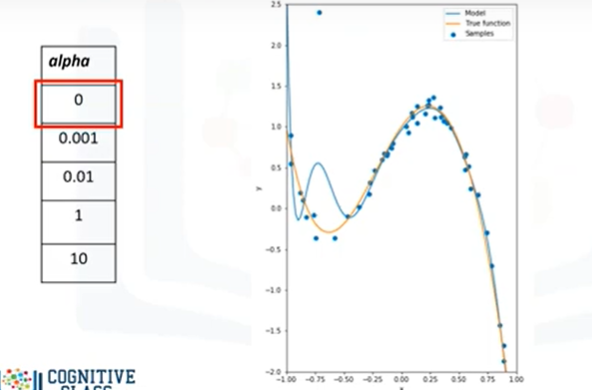

For alpha equal to 0.001, the over fitting begins to subside:

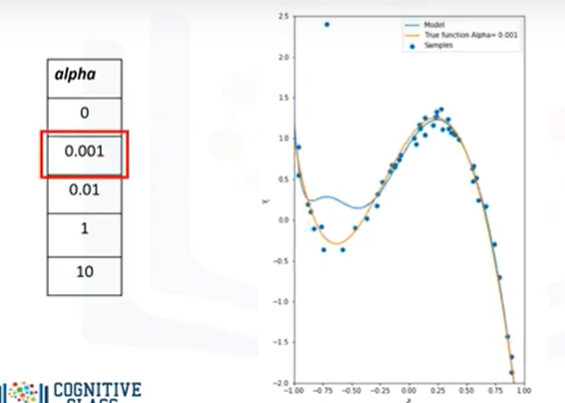

For alpha equal to 0.01, the estimated function tracks the actual function:

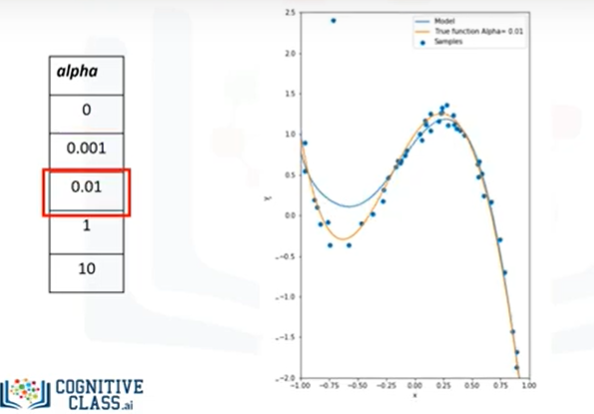

When alpha equals 1, we see the first signs of under-fitting:

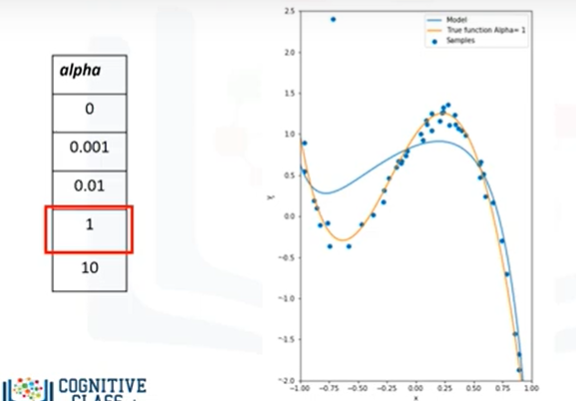

The estimated function does not have enough flexibility.
At alpha equals to 10, we see extreme under-fitting; it does not even track the two points:

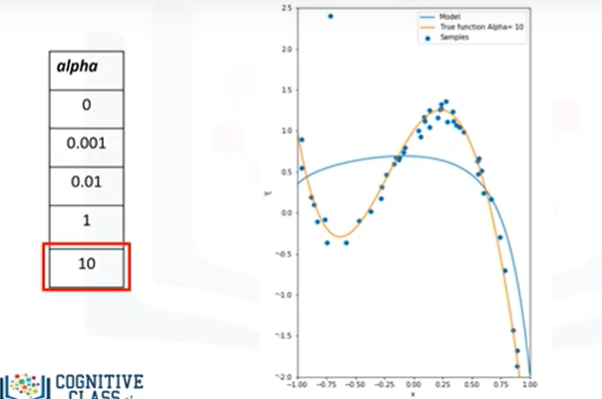

In order to select alpha we use cross-validation.
To make a prediction using ridge regression, import ridge from sklearn linear models.

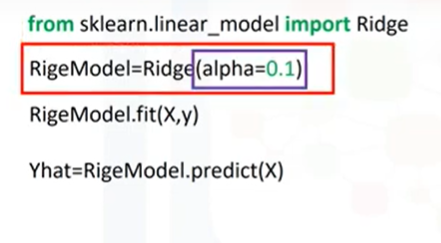

Create a Ridge object using the constructor.
The parameter alpha is one of the arguments of the constructor.
We train the model using the fit method.
To make a prediction, we use the predict method.

In order to determine the parameter alpha, we use some data for training.
We use a second set called validation data; this is similar to test data, but it is used
to select parameters like alpha.
We start with a small value of alpha, we train the model, make a prediction using the validation
data, then calculate the R squared and store the values.

Repeat the value for a larger value of alpha.
We train the model again, make a prediction using the validation data, then calculate
the R squared and store the values of R squared.
We repeat the process for a different alpha value, training the model, and making a prediction.
We select the value of alpha that maximizes the R squared.

Note that we can use other metrics to select the value of alpha like mean squared error.
The Overfitting problem is even worse if we have lots of features.
The following plot shows the different values of R squared on the vertical axis:

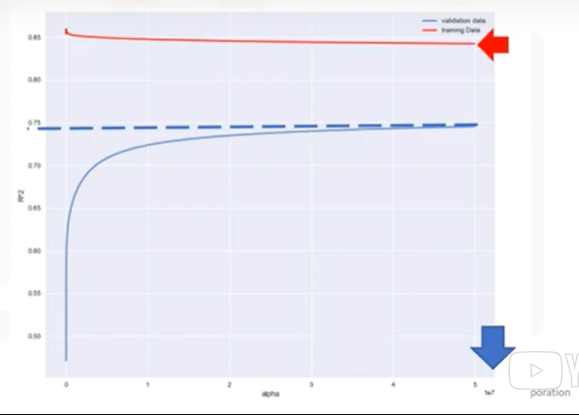

The horizontal axis represents different values for alpha.
We use several features from our used car data set and a second order polynomial function.
The training data is in red and validation data is in blue.
We see as the value for alpha increases, the value the R squared increases and converges
at approximately 0.75.
In this case, we select the maximum value of alpha because running the experiment for
higher values of alpha have little impact.
Conversely, as alpha increases, the R squared on the test data decreases.
This is because the term alpha prevents overfitting.
This may improve the results in the unseen data, but the model has worse performance
on the test data.
See the lab on how to generate this plot.


<h2 id="ref3">Part 3: Ridge Regression</h2> 


 In this section, we will review Ridge Regression and see how the parameter alpha changes the model. Just a note, here our test data will be used as validation data.


 Let's perform a degree two polynomial transformation on our data. 


In [51]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

 Let's import  <b>Ridge</b>  from the module <b>linear models</b>.


In [52]:
from sklearn.linear_model import Ridge

Let's create a Ridge regression object, setting the regularization parameter (alpha) to 0.1 


In [53]:
RigeModel=Ridge(alpha=1)

Like regular regression, you can fit the model using the method <b>fit</b>.


In [54]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

 Similarly, you can obtain a prediction: 


In [55]:
yhat = RigeModel.predict(x_test_pr)

Let's compare the first five predicted samples to our test set: 


In [56]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6570.82441941  9636.2489147  20949.92322737 19403.60313256]
test set : [ 6295. 10698. 13860. 13499.]


We select the value of alpha that minimizes the test error. To do so, we can use a for loop. We have also created a progress bar to see how many iterations we have completed so far.


In [57]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|█████| 1000/1000 [00:05<00:00, 185.94it/s, Test Score=0.564, Train Score=0.859]


We can plot out the value of R^2 for different alphas: 


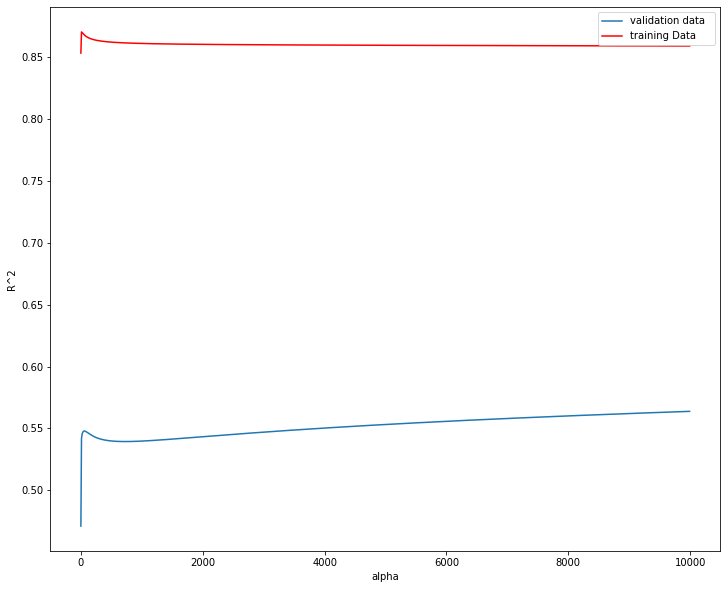

In [58]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

**Figure 4**: The blue line represents the R^2 of the validation data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alpha. 


Here the model is built and tested on the same data, so the training and test data are the same.

The red line in Figure 4 represents the R^2 of the training data. As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data

The blue line represents the R^2 on the validation data. As the value for alpha increases, the R^2 increases and converges at a point.


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #5): </h1>

Perform Ridge regression. Calculate the R^2 using the polynomial features, use the training data to train the model and use the test data to test the model. The parameter alpha should be set to 10.
</div>


In [59]:
# Write your code below and press Shift+Enter to execute 
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.5418576440206702

<details><summary>Click here for the solution</summary>

```python
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

```

</details>



### TRANSCRIPTION:

Grid search allows us to scan through multiple free parameters with few lines of code.

Parameters like the alpha term discussed in the previous video are not part of the fitting
or training process.
These values are called hyperparameters.

Scikit-learn has a means of automatically iterating over these hyperparameters using
cross-validation.
This method is called Grid search.

Grid search takes the model or objects you would like to train and different values of
the hyperparameters.
It then calculates the mean square error or R squared for various hyperparameter values,
allowing you to choose the best values.

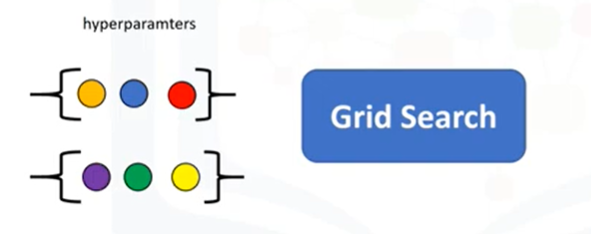

Let the small circles represent different hyperparameters.
We start off with one value for hyperparameters and train the model:

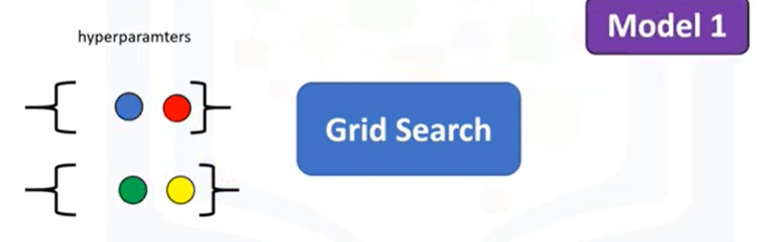

We use different hyperparameters to train the model:

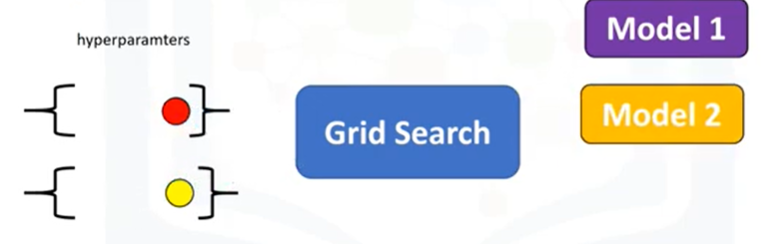

We continue the process until we have exhausted the different free parameter values:

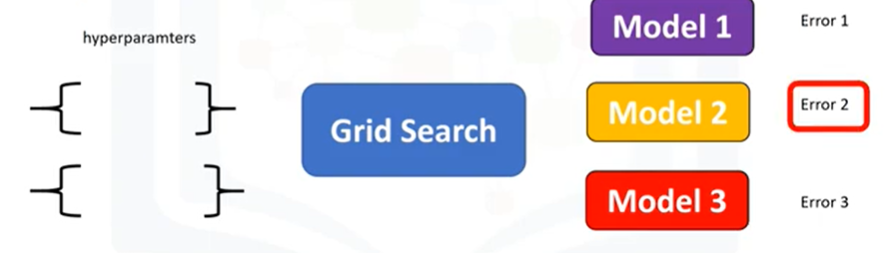

Each model produces an error.
We select the hyperparameter that minimizes the error.


To select the hyperparameter, we split our dataset into three parts, the training set,
validation set, and test set.
We train the model for different hyperparameters.

We use the R squared or mean square error for each model.
We select the hyperparameter that minimizes the mean squared error or maximizes the
R squared on the validation set.
We finally test our model performance using the test data.

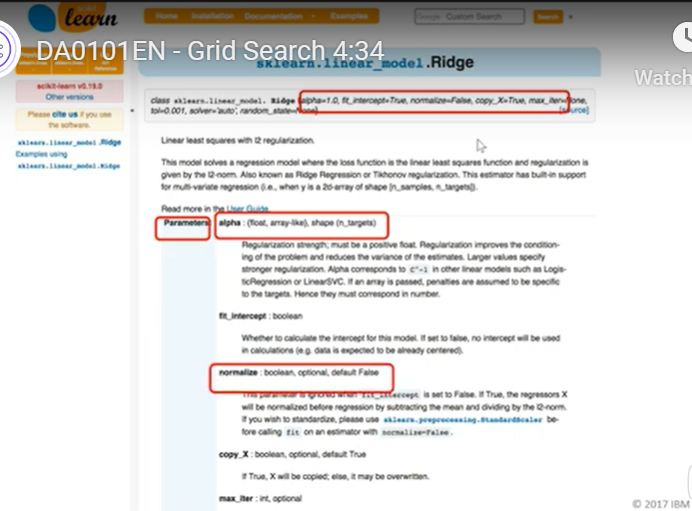

This is the scikit learn web-page where the object constructor parameters are given.
It should be noted that the attributes of an object are also called parameters.
We will not make the distinction even though some of the options are not hyperparameters
per say.
In this module, we will focus on the hyperparameter alpha and the normalization parameter.

The value of your grid search is a Python list that contains a Python dictionary.

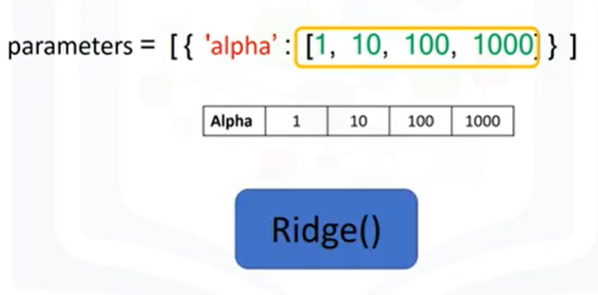

The key is the name of the free parameter.
The value of the dictionary is the different values of the free parameter.
This can be viewed as a table with various free parameter values.

We also have the object or model.
The grid search takes on the scoring method, in this case R squared, the number of folds,
the model or object, and the free parameter values.
Some of the outputs include the different scores for different free parameter values;

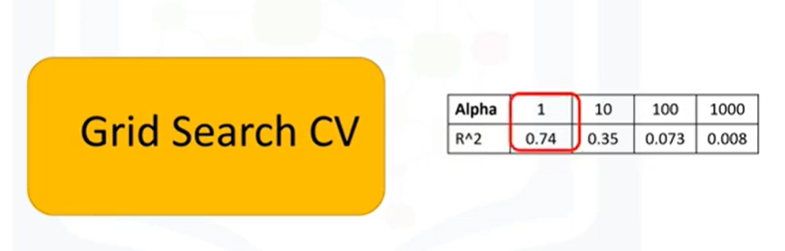

in this case the R squared along with the free parameter values that have the best score.

First, we import the libraries we need including Grid Search CV, the dictionary of parameter
values.

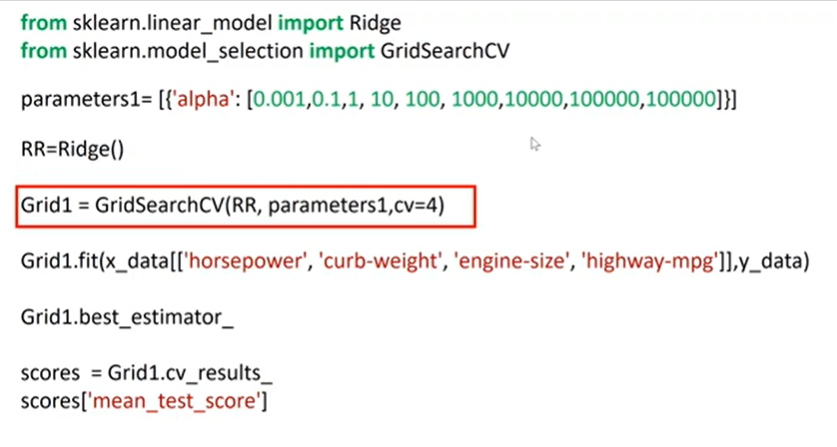

We create a ridge regression object or model.

We then create a Grid Search CV object; the inputs are the ridge regression object, the
parameter values and the number of folds.

We will use R squared; this is the default scoring method.

We fit the object.

We can find the best values for the free parameters using the attribute best estimator.

We can also get information like the mean score on the validation data using the attribute
cv result.

One of the advantages of Grid search is how quickly we can test multiple parameters.
For example, Ridge regression has the option to normalize the data.
To see how to standardize, see Module 4.

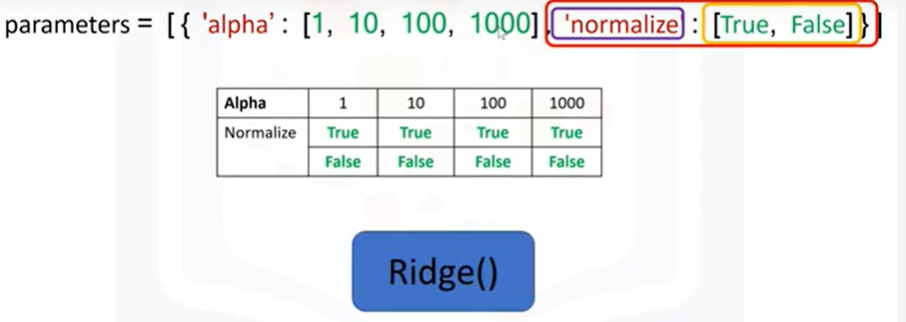

The term alpha is the first element in the dictionary, the second element is the normalize
option.
The key is the name of the parameter.
The value is the different options, in this case, because we can either normalize the
data or not, the values are true or false, respectively.
The Dictionary is a table or grid that contains two different values.
As before, we need the ridge regression object or model.
The procedure is similar, except that we have a table or grid of different parameter values.
The output is the score for all the different combinations of parameter values:

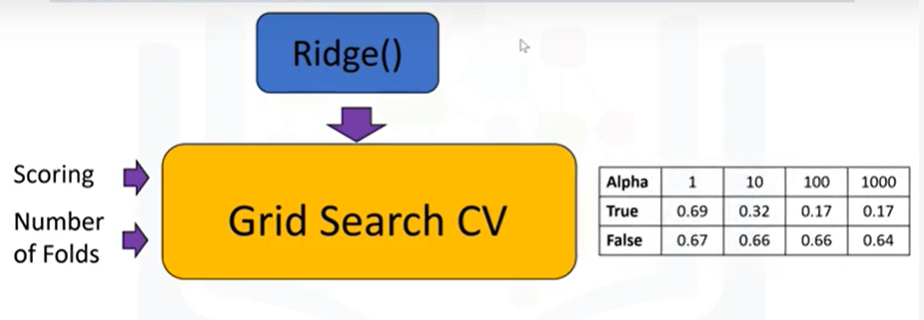

The code is also similar.

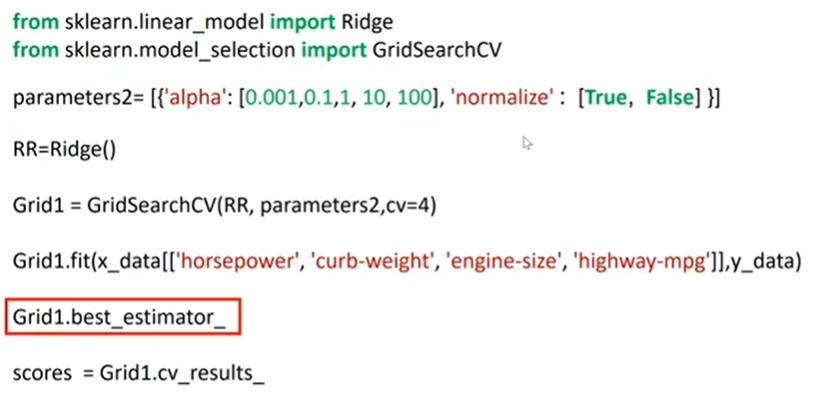

The dictionary contains the different free parameter values.
We can find the best value for the free parameters.
The resulting scores of the different free parameters are stored in this dictionary:
Grid1.cv_results_.
We can print out the score for the different free parameter values.
The parameter values are stored as shown here.
See the course labs for more examples.


<h2 id="ref4">Part 4: Grid Search</h2>


The term alpha is a hyperparameter. Sklearn has the class <b>GridSearchCV</b> to make the process of finding the best hyperparameter simpler.


Let's import <b>GridSearchCV</b> from  the module <b>model_selection</b>.


In [60]:
from sklearn.model_selection import GridSearchCV

We create a dictionary of parameter values:


In [61]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Create a Ridge regression object:


In [62]:
RR=Ridge()
RR

Ridge()

Create a ridge grid search object:


In [64]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In order to avoid a deprecation warning due to the iid parameter, we set the value of iid to "None".

Fit the model:


In [65]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:


In [66]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

 We now test our model on the test data:


In [67]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036152

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #6): </h1>
Perform a grid search for the alpha parameter and the normalization parameter, then find the best values of the parameters:
</div>


In [68]:
# Write your code below and press Shift+Enter to execute 
parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000],'normalize':[True,False]} ]
Grid2 = GridSearchCV(Ridge(), parameters2,cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)
Grid2.best_estimator_

d:\programs\python\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
d:\programs\python\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline 

d:\programs\python\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
d:\programs\python\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline 

d:\programs\python\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
d:\programs\python\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
d:\programs\python\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scal

Ridge(alpha=0.1, normalize=True)

<details><summary>Click here for the solution</summary>

```python
parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000],'normalize':[True,False]} ]
Grid2 = GridSearchCV(Ridge(), parameters2,cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)
Grid2.best_estimator_


```

</details>



### Thank you for completing this lab!


## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork971-2023-01-01">Joseph Santarcangelo</a>


### Other Contributors

<a href="https://www.linkedin.com/in/mahdi-noorian-58219234/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork971-2023-01-01">Mahdi Noorian PhD</a>

Bahare Talayian

Eric Xiao

Steven Dong

Parizad

Hima Vasudevan

<a href="https://www.linkedin.com/in/fiorellawever/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork971-2023-01-01">Fiorella Wenver</a>

<a href=" https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>.



## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-30  | 2.3  | Lakshmi  | Changed URL of csv              |
| 2020-10-05  | 2.2  | Lakshmi  | Removed unused library imports  |
| 2020-09-14  | 2.1  | Lakshmi  | Made changes in OverFitting section  |
| 2020-08-27  | 2.0  | Lavanya  |  Moved lab to course repo in GitLab  |


<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
